## Predicting heart disease using machine learning
This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone has heart disease based on their medical attributes.

## We're going to take the following approach:

1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation


## 1. Problem Definition
In a statement,
> Given clinical parameters about a patient, can we predict whether or not they have heart disease?

## 2. Data
The original data came from the Cleavland data from the UCI Machine Learning Repository. https://archive.ics.uci.edu/ml/datasets/heart+Disease

There is also a version of it available on Kaggle. https://www.kaggle.com/datasets/sumaiyatasmeem/heart-disease-classification-dataset

## 3. Evaluation
If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue the project.

## 4. Features
This is where you'll get different information about each of the features in your data. You can do this via doing your own research (such as looking at the links above) or by talking to a subject matter expert (someone who knows about the dataset).

**create data dictionary**

1. age - age in years
2. sex - (1 = male; 0 = female)
3. cp - chest pain type
* 0: Typical angina: chest pain related decrease blood supply to the heart
* 1: Atypical angina: chest pain not related to heart
* 2: Non-anginal pain: typically esophageal spasms (non heart related)
* 3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl
* serum = LDL + HDL + .2 * triglycerides
* above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
* '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
* 0: Nothing to note
* 1: ST-T Wave abnormality
 * can range from mild symptoms to severe problems
 * signals non-normal heart beat
 * 2: Possible or definite left ventricular hypertrophy
* Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina (1 = yes; 0 = no)
10. oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
* 0: Upsloping: better heart rate with excercise (uncommon)
* 1: Flatsloping: minimal change (typical healthy heart)
* 2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy
* colored vessel means the doctor can see the blood passing through
* the more blood movement the better (no clots)
13. thal - thalium stress result
* 1,3: normal
* 6: fixed defect: used to be defect but ok now
* 7: reversable defect: no proper blood movement when excercising
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)

### Preparing the tools
We're going to use pandas, Matplotlib and NumPy for data analysis and manipulation.

In [1]:
# import all tools we need

#regular EDA(Exploratory Data Analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#To make plots appear inside the notebook
%matplotlib inline 


#Models From Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#Model Evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.metrics import plot_roc_curve

#Trying a new tool 
from catboost import CatBoostClassifier

# Load Data

In [2]:
data = pd.read_csv("heart-disease.csv")
data.shape

(303, 14)

## Data Exploration (exploratory data analysis or EDA)

The goal here is to find out more about the data and become a subject matter export on the dataset you're working with.

1. What question(s) are you trying to solve?
2. What kind of data do we have and how do we treat different types?
3. What's missing from the data and how do you deal with it?
4. Where are the outliers and why should you care about them?
5. How can you add, change or remove features to get more out of your data?

In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
data["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

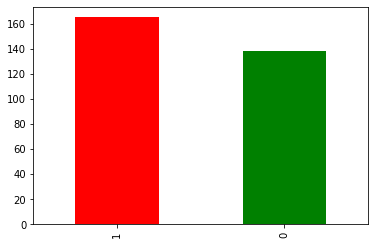

In [6]:
data["target"].value_counts().plot(kind="bar", color = ["Red","green"]);

In [7]:
#Are there any missing value?
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [10]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


## Comparing one-on-one and visualization

In [11]:
data["cp"].value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

In [12]:
CT=pd.crosstab(data["target"],data["cp"])

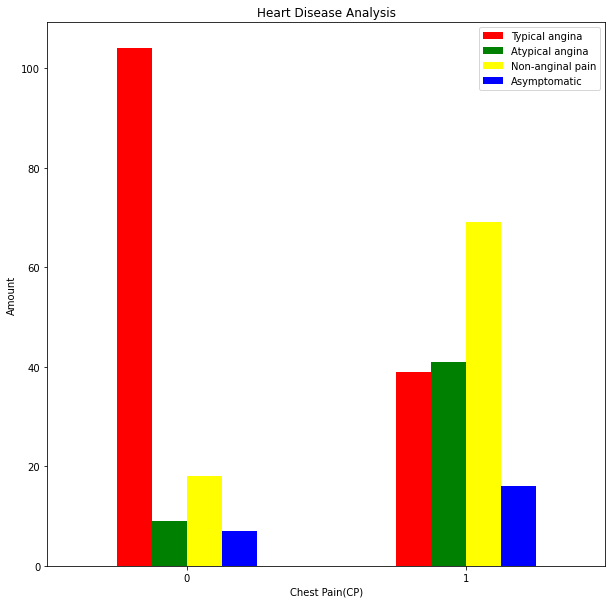

In [13]:
CT.plot(kind="bar",figsize=(10,10),color=["Red", "Green","Yellow","blue"])
plt.title("Heart Disease Analysis")
plt.xlabel("Chest Pain(CP)")
plt.ylabel("Amount")
plt.legend(["Typical angina","Atypical angina","Non-anginal pain","Asymptomatic"])
plt.xticks(rotation=0);

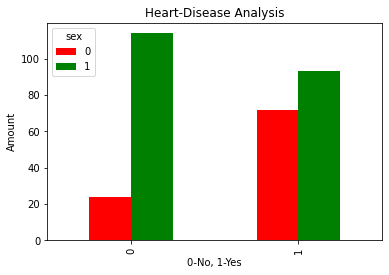

In [14]:
pd.crosstab(data["target"],data["sex"]).plot(kind="bar",color=["Red","green"])
plt.xlabel("0-No, 1-Yes")
plt.ylabel("Amount")
plt.title("Heart-Disease Analysis");

### Age and Thalach for Heart Disease Analysis

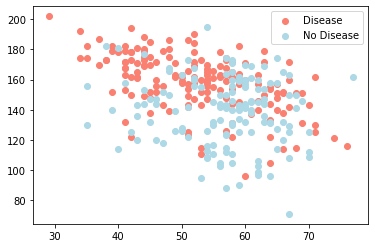

In [15]:
#Scatter with positive examples
plt.scatter(data.age[data.target==1],
            data.thalach[data.target==1], c="salmon")

#Scatter with negative examples
plt.scatter(data.age[data.target==0],
            data.thalach[data.target==0],c="lightblue")

plt.legend(["Disease", "No Disease"])

<AxesSubplot:ylabel='Frequency'>

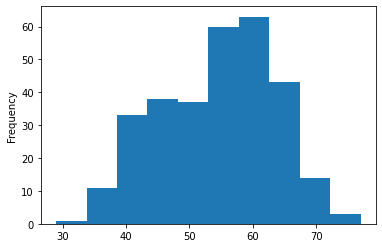

In [16]:
#Distribution of the age column
data.age.plot.hist()

### Heart Dissease Frequency Per Chest Pain Type
* 0: Typical angina: chest pain related decrease blood supply to the heart
* 1: Atypical angina: chest pain not related to heart
* 2: Non-anginal pain: typically esophageal spasms (non heart related)
* 3: Asymptomatic: chest pain not showing signs of disease

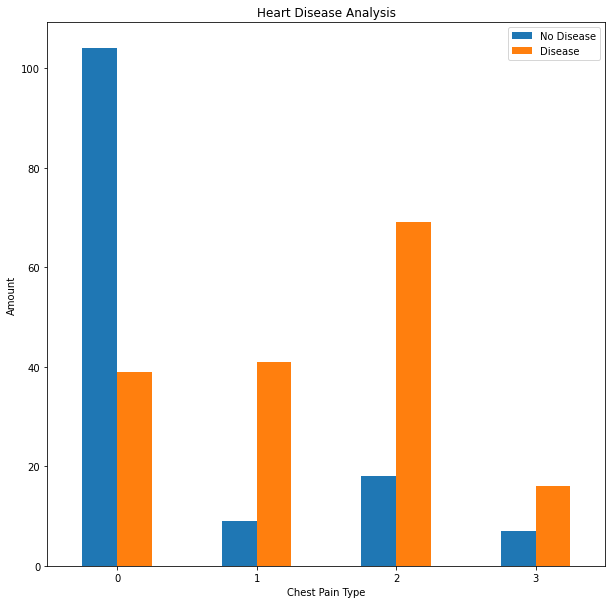

In [17]:
pd.crosstab(data.cp, data.target).plot(kind="bar",figsize=(10,10))
plt.title("Heart Disease Analysis")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation=0);

In [18]:
data.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


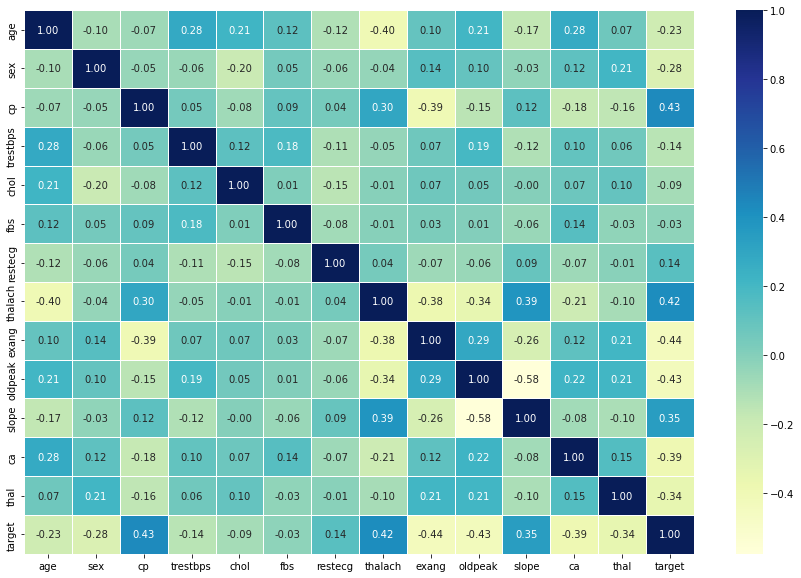

In [19]:
# Correlation matrix heatmap using seaborn
corr_mat = data.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_mat,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu"
                );

### 5. Modeling

In [20]:
# Split the data into X and Y

X = data.drop("target", axis=1)
Y = data["target"]

In [21]:
#Split the data into train and test set
np.random.seed(42)
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2)
len(X_train), len(X_test), len(Y_train), len(Y_test)

(242, 61, 242, 61)

In [22]:
def fit_and_score(models, X_train, X_test, Y_train, Y_test):
    model_scores = {}
    for name,value in models.items():
        model = value
        model.fit(X_train,Y_train)
        model_scores[name] = model.score(X_test,Y_test)
    return model_scores

In [23]:
models =  {"LogisticReg" : LogisticRegression(),
          "KNN" : KNeighborsClassifier(),
          "RandomForest" : RandomForestClassifier()}
model_scores = fit_and_score(models, X_train, X_test, Y_train, Y_test)

C:\users\kartik\miniconda_projects\env\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [24]:
model_scores

{'LogisticReg': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'RandomForest': 0.8524590163934426}

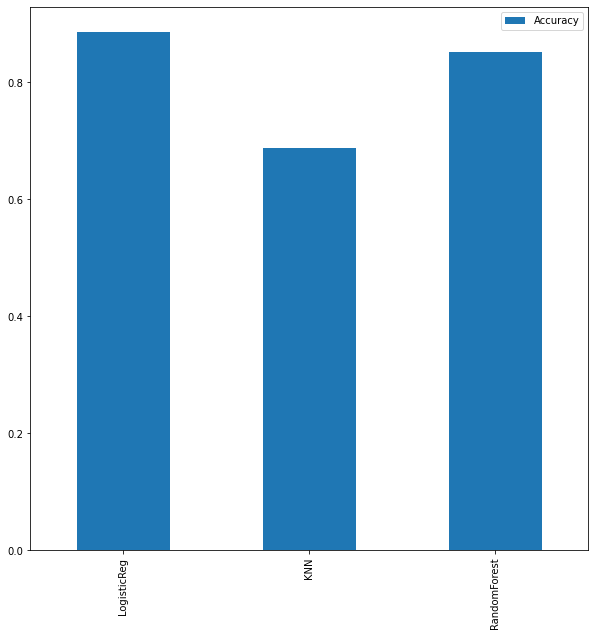

In [25]:
pd.DataFrame(model_scores, index = ["Accuracy"]).T.plot(kind="bar", figsize=(10,10));

#### IMPORTANT
* Hyperparameter Tuning    
* Feature Importance
#### Specifically for Classification

* Confusion Matrix
* Cross-Validation
* Precision
* Recall
* F1 Score
* Classification Report
* ROC Curve
* Area under the Curve(AUC)

### HyperParameter Tuning(By Hand)

In [26]:
#List For Scores
np.random.seed(42)
trained_data = []
tested_data = []

#A range for neighbors
neighbors = range(1,21)

#Model Training with hyperparams
model = KNeighborsClassifier()

for i in neighbors:
    
    model.set_params(n_neighbors = i)
    
    #Training a model
    model.fit(X_train, Y_train)
    
    #Updating Trained_data list
    trained_data.append(model.score(X_train,Y_train))
    
    #Updating Tested_data list
    tested_data.append(model.score(X_test, Y_test))
    


In [27]:
trained_data

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [28]:
tested_data

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum Accuracy In test DataSet : 75.41%


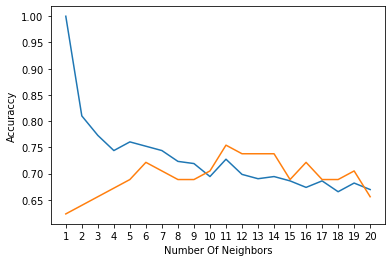

In [29]:
plt.plot(neighbors, trained_data, label="Trained Score")
plt.plot(neighbors, tested_data, label="Tested Score")
plt.xlabel("Number Of Neighbors")
plt.ylabel("Accuraccy")
plt.xticks(np.arange(1,21));
# plt.yticks(np.arange(0,1,0.3));

print(f"Maximum Accuracy In test DataSet : {max(tested_data)*100:.2f}%")

### Hyperparameter Tuning by RandomizedSearchCV

* LogisticRegression()
* RandomForestClassifier()

In [30]:
lr_grid = {"C" : np.logspace(-4, 4, 20),
           "solver" : ["liblinear"]}

rf_grid = {"n_estimators" : np.arange(10, 1000, 50),
           "max_depth" : [None, 3, 5, 10],
           "min_samples_split" : np.arange(2,20,2),
           "min_samples_leaf" : np.arange(1,20,2)}

In [31]:
model = LogisticRegression()

np.random.seed(42)

#setup RandomSearchCv for hyperparameters of LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=lr_grid,
                                n_iter = 20,
                                verbose=2,
                                n_jobs=2,
                                cv=5)

#Fit random Hyperparameter search model for LogisticRegression
rs_log_reg.fit(X_train, Y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [32]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [33]:
rs_log_reg.score(X_test,Y_test)

0.8852459016393442

In [34]:
clf = RandomForestClassifier()

rs_clf = RandomizedSearchCV(RandomForestClassifier(),
                            param_distributions = rf_grid,
                            cv=5,
                            verbose = 2,
                            n_iter = 50,
                            n_jobs = 2)
rs_clf.fit(X_train, Y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=50,
                   n_jobs=2,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=2)

In [35]:
rs_clf.score(X_train,Y_train) 

0.859504132231405

In [36]:
log_reg_grid = {"C" : np.logspace(-4,4,30),
                "solver" : ["liblinear"]}
    
gs_cv = GridSearchCV(model,
                     param_grid=log_reg_grid,
                     verbose=True,
                     cv=5)
gs_cv.fit(X_train,Y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [37]:
gs_cv.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [38]:
gs_cv.score(X_test,Y_test)

0.8852459016393442

### Evaluating Our tuned model learning classifier beyond accuracy

* ROC curve & AUC Score
* Confusion Matrix
* Classification Report
* Precision
* Recall
* F1 - Score

... Use CV as most as possible

### Area under the receiever operating characteristic curve(ROC)

* Area under Curve
* Roc Curve

<img src = "PN_rates.png">

#### Roc curves ar a a comparison of a model's true positive rate(TPR) vs model's false positive rate(FPR)

* True Positive = model predicts 1 when truth is 1
* False Positive = model predicts 1 when truth is 0

* True Negative = model predicts 0 when truth is 0
* False Negative = model predicts 0 when truth is 1

C:\users\kartik\miniconda_projects\env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


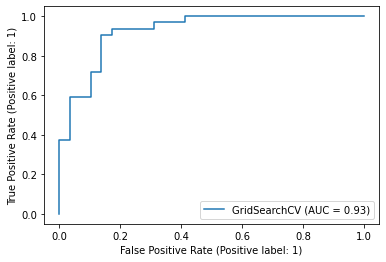

In [39]:
plot_roc_curve(gs_cv, X_test, Y_test);

In [40]:
Y_preds = gs_cv.predict(X_test)
print(confusion_matrix(Y_test, Y_preds))

[[25  4]
 [ 3 29]]


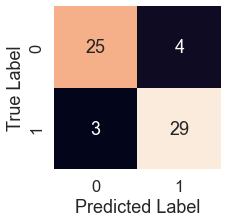

In [41]:
sns.set(font_scale=1.5)
def plot_conf_mat(y_test, y_preds):
    
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot = True,
                     cbar = False)
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")
    
#     bottom, top = ax.get_ylim()
#     ax.set_ylim(bottom + 0.5, top - 0.5)

plot_conf_mat(Y_test, Y_preds)

&rarr; Classification report with Cross - Validation

In [42]:
print(classification_report(Y_test,Y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



## Calculate evaluation metrics using cross-validation

In [43]:
gs_cv.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [44]:
#Calculating Accuracy

model = LogisticRegression(C=0.20433597178569418,
                           solver='liblinear')
cv_acc = cross_val_score(model,
                        X,
                        Y,
                        cv=5,
                        scoring="accuracy");

cv_acc

array([0.81967213, 0.90163934, 0.86885246, 0.88333333, 0.75      ])

In [45]:
cv_acc = np.mean(cv_acc)
cv_acc

0.8446994535519124

In [46]:
#Calculating Precision


cv_pre = cross_val_score(model,
                        X,
                        Y,
                        cv=5,
                        scoring="precision");

cv_pre

array([0.775     , 0.88571429, 0.85714286, 0.86111111, 0.725     ])

In [47]:
cv_pre = np.mean(cv_pre)
cv_pre

0.8207936507936507

In [48]:
#Calculating recall


cv_recall = cross_val_score(model,
                        X,
                        Y,
                        cv=5,
                        scoring="recall");

cv_recall

array([0.93939394, 0.93939394, 0.90909091, 0.93939394, 0.87878788])

In [49]:
cv_recall = np.mean(cv_recall)
cv_recall

0.9212121212121213

In [50]:
#Calculating F1


cv_F1 = cross_val_score(model,
                        X,
                        Y,
                        cv=5,
                        scoring="f1");

cv_F1

array([0.84931507, 0.91176471, 0.88235294, 0.89855072, 0.79452055])

In [51]:
cv_F1 = np.mean(cv_F1)
cv_F1

0.8673007976269721

In [52]:
all_scores = pd.DataFrame({"Accuracy" : cv_acc,
             "Precision" : cv_pre,
             "Recall" : cv_recall,
             "F1" : cv_F1},
              index = [0])


<AxesSubplot:title={'center':'Evaluation metrics using cross-validation'}>

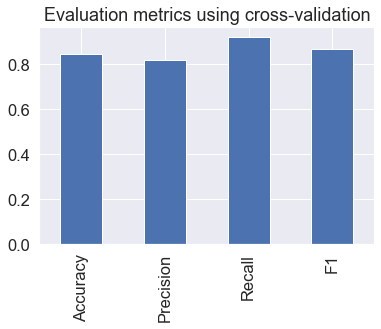

In [53]:
all_scores.T.plot.bar(title = "Evaluation metrics using cross-validation",
                     legend = False)

### Feature Importance

* Feature Importance is the feature which contributes the most in a model's outcome and how they contribute?

* Feature Importance is different for every model

* One way to find Feature Importance of a model is to search "(model_name) Feature Importance"

* Here we are finding Feature Importance of Logistic Regression...


In [54]:
gs_cv.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [55]:
clf = LogisticRegression(C= 0.20433597178569418, solver= 'liblinear')
clf.fit(X_train,Y_train)

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [56]:
clf.coef_

array([[ 0.00316728, -0.86044651,  0.66067041, -0.01156993, -0.00166374,
         0.04386107,  0.31275847,  0.02459361, -0.6041308 , -0.56862804,
         0.45051628, -0.63609897, -0.67663373]])

In [57]:
relations = dict(zip(data.columns,list(clf.coef_[0])))
relations

{'age': 0.0031672801993431563,
 'sex': -0.8604465072345515,
 'cp': 0.6606704082033799,
 'trestbps': -0.01156993168080875,
 'chol': -0.001663744504776871,
 'fbs': 0.043861071652469864,
 'restecg': 0.31275846822418324,
 'thalach': 0.024593613737779126,
 'exang': -0.6041308000615746,
 'oldpeak': -0.5686280368396555,
 'slope': 0.4505162797258308,
 'ca': -0.6360989676086223,
 'thal': -0.6766337263029825}

<AxesSubplot:title={'center':'Feature Importance Visulations'}>

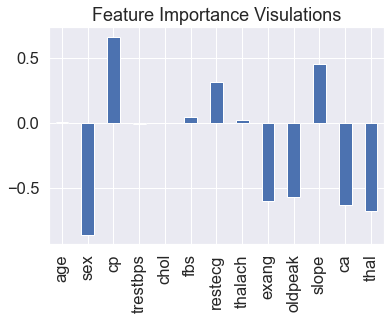

In [58]:
# visualize Feature Importance

relations = pd.DataFrame(relations, index=[0])
relations.T.plot.bar(title = "Feature Importance Visulations", legend=False)

In [59]:
pd.crosstab(data["sex"],data["target"])

target,0,1
sex,,
0,24,72
1,114,93


In [60]:
# slope - the slope of the peak exercise ST segment
# 0: Upsloping: better heart rate with excercise (uncommon)
# 1: Flatsloping: minimal change (typical healthy heart)
# 2: Downslopins: signs of unhealthy heart
pd.crosstab(data["slope"],data["target"])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


## 6. Experimentation

If u havent hit enough with ur eval metrics yet... then..

* Could u collect more data ?
* Try a better model like xgboost and catboost?
* could u improve current model
* Is your model is good enough(you have hit ur eval metrics)


In [61]:
model = CatBoostClassifier()

model.fit(X_train, Y_train)

Learning rate set to 0.005621
0:	learn: 0.6884219	total: 196ms	remaining: 3m 16s
1:	learn: 0.6846994	total: 198ms	remaining: 1m 38s
2:	learn: 0.6804470	total: 199ms	remaining: 1m 6s
3:	learn: 0.6762242	total: 201ms	remaining: 50s
4:	learn: 0.6716784	total: 202ms	remaining: 40.3s
5:	learn: 0.6672808	total: 204ms	remaining: 33.8s
6:	learn: 0.6639958	total: 205ms	remaining: 29.1s
7:	learn: 0.6601980	total: 207ms	remaining: 25.6s
8:	learn: 0.6563766	total: 208ms	remaining: 23s
9:	learn: 0.6525103	total: 210ms	remaining: 20.8s
10:	learn: 0.6483670	total: 211ms	remaining: 19s
11:	learn: 0.6448827	total: 213ms	remaining: 17.5s
12:	learn: 0.6412767	total: 214ms	remaining: 16.3s
13:	learn: 0.6374286	total: 215ms	remaining: 15.2s
14:	learn: 0.6335427	total: 217ms	remaining: 14.2s
15:	learn: 0.6288052	total: 218ms	remaining: 13.4s
16:	learn: 0.6250489	total: 220ms	remaining: 12.7s
17:	learn: 0.6209495	total: 221ms	remaining: 12.1s
18:	learn: 0.6181899	total: 223ms	remaining: 11.5s
19:	learn: 0.61

217:	learn: 0.3111628	total: 518ms	remaining: 1.86s
218:	learn: 0.3106289	total: 519ms	remaining: 1.85s
219:	learn: 0.3096439	total: 521ms	remaining: 1.85s
220:	learn: 0.3087572	total: 523ms	remaining: 1.84s
221:	learn: 0.3080645	total: 526ms	remaining: 1.84s
222:	learn: 0.3077284	total: 529ms	remaining: 1.84s
223:	learn: 0.3068238	total: 530ms	remaining: 1.84s
224:	learn: 0.3060865	total: 532ms	remaining: 1.83s
225:	learn: 0.3053261	total: 534ms	remaining: 1.83s
226:	learn: 0.3049830	total: 536ms	remaining: 1.82s
227:	learn: 0.3043831	total: 538ms	remaining: 1.82s
228:	learn: 0.3036527	total: 539ms	remaining: 1.81s
229:	learn: 0.3029137	total: 544ms	remaining: 1.82s
230:	learn: 0.3023233	total: 545ms	remaining: 1.81s
231:	learn: 0.3019126	total: 547ms	remaining: 1.81s
232:	learn: 0.3011656	total: 549ms	remaining: 1.81s
233:	learn: 0.3004942	total: 551ms	remaining: 1.8s
234:	learn: 0.2999039	total: 552ms	remaining: 1.8s
235:	learn: 0.2989374	total: 555ms	remaining: 1.79s
236:	learn: 0.

415:	learn: 0.2179774	total: 844ms	remaining: 1.18s
416:	learn: 0.2174186	total: 846ms	remaining: 1.18s
417:	learn: 0.2168941	total: 848ms	remaining: 1.18s
418:	learn: 0.2167618	total: 849ms	remaining: 1.18s
419:	learn: 0.2164391	total: 851ms	remaining: 1.17s
420:	learn: 0.2161196	total: 852ms	remaining: 1.17s
421:	learn: 0.2157739	total: 854ms	remaining: 1.17s
422:	learn: 0.2154251	total: 855ms	remaining: 1.17s
423:	learn: 0.2152802	total: 857ms	remaining: 1.16s
424:	learn: 0.2151494	total: 858ms	remaining: 1.16s
425:	learn: 0.2147988	total: 860ms	remaining: 1.16s
426:	learn: 0.2145900	total: 861ms	remaining: 1.16s
427:	learn: 0.2145617	total: 862ms	remaining: 1.15s
428:	learn: 0.2141954	total: 864ms	remaining: 1.15s
429:	learn: 0.2137315	total: 865ms	remaining: 1.15s
430:	learn: 0.2134406	total: 867ms	remaining: 1.14s
431:	learn: 0.2130804	total: 868ms	remaining: 1.14s
432:	learn: 0.2127306	total: 870ms	remaining: 1.14s
433:	learn: 0.2124362	total: 871ms	remaining: 1.14s
434:	learn: 

609:	learn: 0.1671551	total: 1.17s	remaining: 750ms
610:	learn: 0.1671136	total: 1.17s	remaining: 747ms
611:	learn: 0.1669804	total: 1.18s	remaining: 745ms
612:	learn: 0.1668549	total: 1.18s	remaining: 743ms
613:	learn: 0.1665932	total: 1.18s	remaining: 741ms
614:	learn: 0.1663617	total: 1.18s	remaining: 739ms
615:	learn: 0.1661127	total: 1.18s	remaining: 737ms
616:	learn: 0.1659293	total: 1.18s	remaining: 735ms
617:	learn: 0.1658495	total: 1.19s	remaining: 733ms
618:	learn: 0.1657121	total: 1.19s	remaining: 730ms
619:	learn: 0.1654821	total: 1.19s	remaining: 728ms
620:	learn: 0.1653202	total: 1.19s	remaining: 726ms
621:	learn: 0.1650090	total: 1.19s	remaining: 724ms
622:	learn: 0.1648093	total: 1.19s	remaining: 722ms
623:	learn: 0.1646301	total: 1.2s	remaining: 720ms
624:	learn: 0.1643550	total: 1.2s	remaining: 718ms
625:	learn: 0.1640660	total: 1.2s	remaining: 716ms
626:	learn: 0.1638388	total: 1.2s	remaining: 714ms
627:	learn: 0.1636262	total: 1.2s	remaining: 712ms
628:	learn: 0.163

818:	learn: 0.1300777	total: 1.5s	remaining: 331ms
819:	learn: 0.1299202	total: 1.5s	remaining: 330ms
820:	learn: 0.1296712	total: 1.5s	remaining: 328ms
821:	learn: 0.1295493	total: 1.5s	remaining: 326ms
822:	learn: 0.1294479	total: 1.5s	remaining: 324ms
823:	learn: 0.1291381	total: 1.51s	remaining: 322ms
824:	learn: 0.1289627	total: 1.51s	remaining: 320ms
825:	learn: 0.1288439	total: 1.51s	remaining: 318ms
826:	learn: 0.1287441	total: 1.51s	remaining: 316ms
827:	learn: 0.1286802	total: 1.51s	remaining: 314ms
828:	learn: 0.1285093	total: 1.51s	remaining: 312ms
829:	learn: 0.1283655	total: 1.52s	remaining: 311ms
830:	learn: 0.1282872	total: 1.52s	remaining: 309ms
831:	learn: 0.1281096	total: 1.52s	remaining: 307ms
832:	learn: 0.1278886	total: 1.52s	remaining: 305ms
833:	learn: 0.1276895	total: 1.52s	remaining: 303ms
834:	learn: 0.1274980	total: 1.52s	remaining: 301ms
835:	learn: 0.1273755	total: 1.52s	remaining: 299ms
836:	learn: 0.1272936	total: 1.53s	remaining: 297ms
837:	learn: 0.127

In [62]:
model.score(X_test, Y_test)

0.8360655737704918

In [63]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [64]:
from xgboost import XGBRFClassifier

model = XGBRFClassifier()

model.fit(X_train, Y_train);


In [65]:
model.score(X_test, Y_test)

0.8524590163934426